In [1607]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#importing libraries

df_beds=pd.read_csv('HospitalBedsIndia.csv') #Hospital Beds dataset

df_population=pd.read_csv('population_india_census2011.csv') #India's Population dataset

df_testing=pd.read_csv('StatewiseTestingDetails.csv') #India's Testing dataset


In [1608]:
df_beds.drop('Sno', axis=1, inplace=True) #Drop unnecessary column
df_beds[df_beds.columns[1:]]=(df_beds[df_beds.columns[1:]].interpolate(method='linear',limit_direction='backward',axis=1)).astype(int) #Predicting NaN values through interpolation
df_beds['Total_Hospital_Beds']=df_beds[df_beds.columns[1:]].sum(axis=1)  #Sum of no. of beds in all the columns
df_beds.head()

,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Total_Hospital_Beds
0,Andaman and Nicobar Islands,27,4,3,3,34,1246,27,575,3,500,2422
1,Andhra Pradesh,1417,198,31,20,1666,60799,193,6480,65,16658,87527
2,Arunachal Pradesh,122,62,38,15,199,2320,208,2136,10,268,5378
3,Assam,1007,166,14,33,1220,19115,1176,10944,50,6198,39923
4,Bihar,2007,63,33,43,2146,17796,930,6083,103,5936,35140


In [1609]:
df_population.drop('Sno', axis=1, inplace=True) #Drop unnecessary column
df_population.rename(columns = {'State / Union Territory':'State/UT'},inplace=True)  #Renaming common column to merge dataframes

df_population.head()

,State/UT,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876
1,Andhra Pradesh,49577103,34966693,14610410,"162,968 km2 (62,922 sq mi)",303/km2 (780/sq mi),993
2,Arunachal Pradesh,1383727,1066358,317369,"83,743 km2 (32,333 sq mi)",17/km2 (44/sq mi),938
3,Assam,31205576,26807034,4398542,"78,438 km2 (30,285 sq mi)","397/km2 (1,030/sq mi)",954
4,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918


In [1610]:
df_final=pd.merge(df_population,df_beds, on='State/UT') #Merge population and beds dataset
df_final['Beds_per_million']=(df_final['Total_Hospital_Beds']/(df_final['Population']/1000000)).astype(int) #Calculating no. of beds per million people

df_final.head()

,State/UT,Population,Rural population,Urban population,Area,Density,Gender Ratio,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Total_Hospital_Beds,Beds_per_million
0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,27,4,3,3,34,1246,27,575,3,500,2422,6363
1,Andhra Pradesh,49577103,34966693,14610410,"162,968 km2 (62,922 sq mi)",303/km2 (780/sq mi),993,1417,198,31,20,1666,60799,193,6480,65,16658,87527,1765
2,Arunachal Pradesh,1383727,1066358,317369,"83,743 km2 (32,333 sq mi)",17/km2 (44/sq mi),938,122,62,38,15,199,2320,208,2136,10,268,5378,3886
3,Assam,31205576,26807034,4398542,"78,438 km2 (30,285 sq mi)","397/km2 (1,030/sq mi)",954,1007,166,14,33,1220,19115,1176,10944,50,6198,39923,1279
4,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918,2007,63,33,43,2146,17796,930,6083,103,5936,35140,337


In [1611]:
df_testing.rename(columns = {'State':'State/UT'},inplace=True) #Renaming common column to merge dataframes

df_testing.dropna(subset=['Tested'],how='any',axis=0,inplace=True) #Drop rows having NaN in Tested column

df_final=pd.merge(df_final,df_testing, on='State/UT') #Merge testing dataset with final dataset
df_final['Tested']=df_final['Tested'].astype(int) #Coverting values to integer

df_final.head()

,State/UT,Population,Rural population,Urban population,Area,Density,Gender Ratio,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,...,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Total_Hospital_Beds,Beds_per_million,Tested,Confirmed,Recovered,Deaths,Active
0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,27,4,3,...,575,3,500,2422,6363,1403,15,11,0,4
1,Andhra Pradesh,49577103,34966693,14610410,"162,968 km2 (62,922 sq mi)",303/km2 (780/sq mi),993,1417,198,31,...,6480,65,16658,87527,1765,20235,647,65,17,565
2,Arunachal Pradesh,1383727,1066358,317369,"83,743 km2 (32,333 sq mi)",17/km2 (44/sq mi),938,122,62,38,...,2136,10,268,5378,3886,363,1,1,0,0
3,Assam,31205576,26807034,4398542,"78,438 km2 (30,285 sq mi)","397/km2 (1,030/sq mi)",954,1007,166,14,...,10944,50,6198,39923,1279,4236,35,17,1,17
4,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918,2007,63,33,...,6083,103,5936,35140,337,9486,96,42,2,52


In [1612]:
df_final['Tests_per_million']=(df_final['Tested']/df_final['Population'])*1000000 #Calculating Tests per million
df_final['Death_Percent']=(df_final['Deaths']/df_final['Confirmed'])*100 #Calculating Death Percentage
df_final['Recovery_Percent']=(df_final['Recovered']/df_final['Confirmed'])*100 #Calculating Recovery Percentage
df_final['Confirmation_Percent']=(df_final['Confirmed']/df_final['Tested'])*100 #Calculating Confirmation Percentage

df_final.fillna(0,inplace=True)

df_final['Tests_per_million']=df_final['Tests_per_million'].round() #Rounding Tests per million
df_final['Death_Percent']=df_final['Death_Percent'].round() #Rounding Death Percentage
df_final['Recovery_Percent']=df_final['Recovery_Percent'].round() #Rounding Recovery Percentage
df_final['Confirmation_Percent']=df_final['Confirmation_Percent'].round() #Rounding Confirmation Percentage

df_final.head()

,State/UT,Population,Rural population,Urban population,Area,Density,Gender Ratio,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,...,Beds_per_million,Tested,Confirmed,Recovered,Deaths,Active,Tests_per_million,Death_Percent,Recovery_Percent,Confirmation_Percent
0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,27,4,3,...,6363,1403,15,11,0,4,3686.0,0.0,73.0,1.0
1,Andhra Pradesh,49577103,34966693,14610410,"162,968 km2 (62,922 sq mi)",303/km2 (780/sq mi),993,1417,198,31,...,1765,20235,647,65,17,565,408.0,3.0,10.0,3.0
2,Arunachal Pradesh,1383727,1066358,317369,"83,743 km2 (32,333 sq mi)",17/km2 (44/sq mi),938,122,62,38,...,3886,363,1,1,0,0,262.0,0.0,100.0,0.0
3,Assam,31205576,26807034,4398542,"78,438 km2 (30,285 sq mi)","397/km2 (1,030/sq mi)",954,1007,166,14,...,1279,4236,35,17,1,17,136.0,3.0,49.0,1.0
4,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918,2007,63,33,...,337,9486,96,42,2,52,91.0,2.0,44.0,1.0


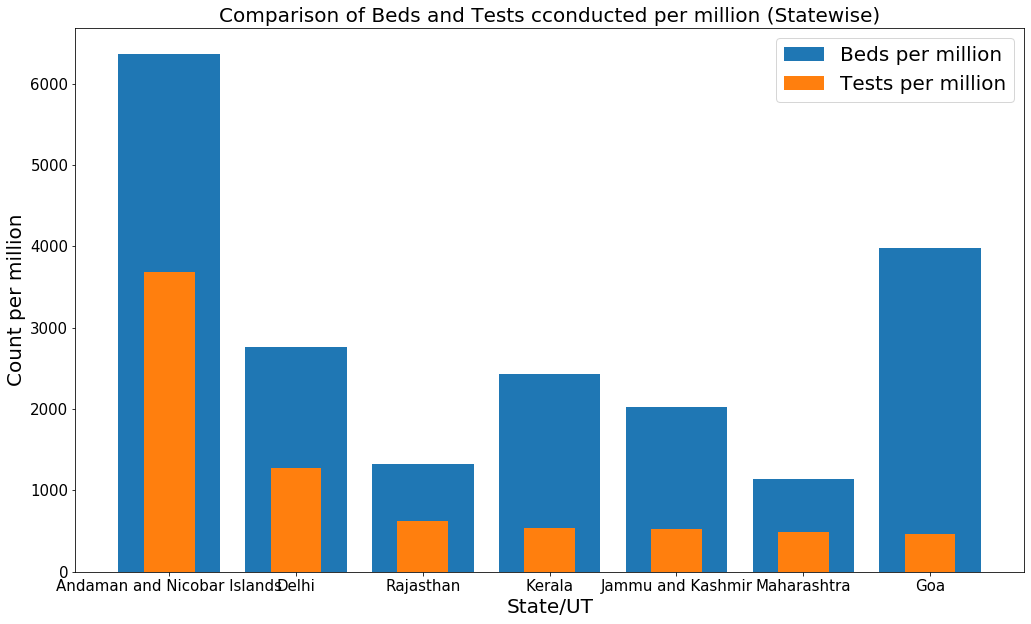

In [1619]:
df=pd.DataFrame(data={'State/UT':df_final['State/UT'],'Beds_per_million':df_final['Beds_per_million'],'Tests_per_million':df_final['Tests_per_million']}) #Creating a new datframe 

df=df.sort_values(by='Tests_per_million',ascending=False) #Sorting dataframe on the basis of Tests_per_million in descending order
df=df.iloc[:7,:] #Selecting top 10 rows

plt.figure(figsize=(17,10)) #Adjusting size of figure

plt.title('Comparison of Beds and Tests cconducted per million (Statewise)',fontsize=20) #Title of plot
plt.xlabel('State/UT',fontsize=20) #Naming label on X-axis
plt.ylabel('Count per million',fontsize=20) #Naming label on Y-axis

p1=plt.bar(df['State/UT'],df['Beds_per_million']) #Plotting bar graph
p2=plt.bar(df['State/UT'],df['Tests_per_million'],0.4) #Plotting bar graph

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend((p1,p2), ('Beds per million','Tests per million'),fontsize=20) #Marking legends on plot


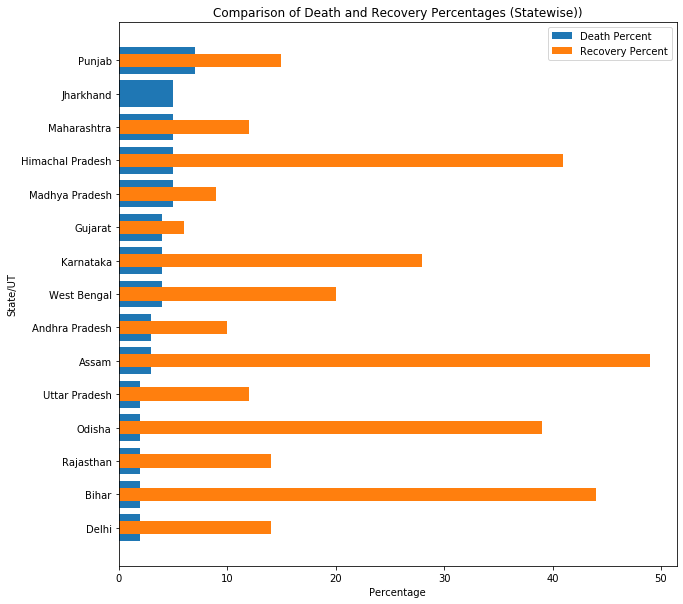

In [1616]:
df1=pd.DataFrame(data={'State/UT':df_final['State/UT'],'Death_Percent':df_final['Death_Percent'],'Recovery_Percent':df_final['Recovery_Percent']}) #Creating a new datframe

df1=df1.sort_values(by='Death_Percent',ascending=True) #Sorting dataframe on the basis of Death Percentage in ascending order
df1=df1.iloc[-15:,:] #Selecting last 10 rows

plt.figure(figsize=(10,10)) #Adjusting size of figure

plt.title('Comparison of Death and Recovery Percentages (Statewise))') #Title of plot
plt.xlabel('Percentage') #Naming label on X-axis
plt.ylabel('State/UT') #Naming label on Y-axis

p1=plt.barh(df1['State/UT'],df1['Death_Percent']) #Plotting horizontal bar graph
p2=plt.barh(df1['State/UT'],df1['Recovery_Percent'],0.4) #Plotting horizontal bar graph

plt.legend((p1,p2), ('Death Percent','Recovery Percent')) #Marking legends on plot


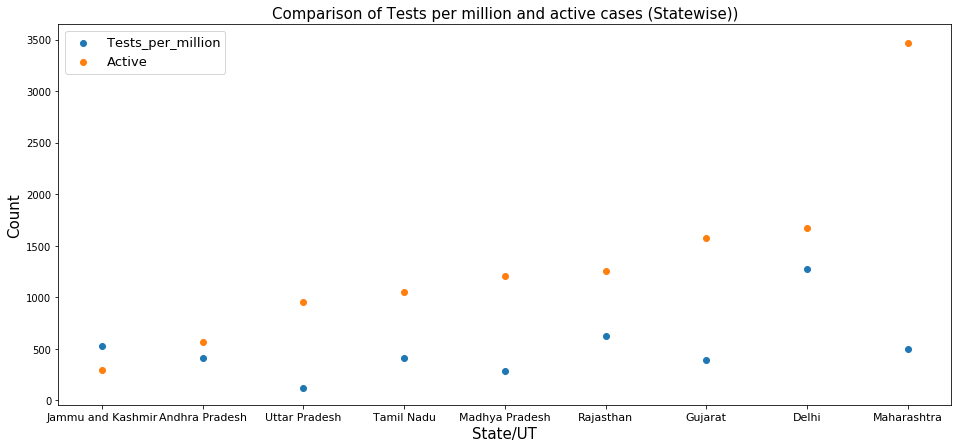

In [1636]:
df2=pd.DataFrame(data={'State/UT':df_final['State/UT'],'Tests_per_million':df_final['Tests_per_million'],'Active':df_final['Active']}) #Creating a new datframe

df2=df2.sort_values(by='Active',ascending=True) #Sorting dataframe on the basis of Active cases in ascending order
df2=df2.iloc[-9:,:] #Selecting last 10 rows

plt.figure(figsize=(16,7)) #Adjusting size of figure

plt.title('Comparison of Tests per million and active cases (Statewise))',fontsize=15) #Title of plot
plt.xlabel('State/UT',fontsize=15) #Naming label on X-axis
plt.ylabel('Count',fontsize=15) #Naming label on Y-axis

p1=plt.scatter(df2['State/UT'],df2['Tests_per_million']) #Plotting scatter plot
p2=plt.scatter(df2['State/UT'],df2['Active']) #Plotting scatter plot

plt.xticks(fontsize=11)
plt.yticks(fontsize=10)

plt.legend((p1,p2), ('Tests_per_million','Active'),fontsize=13)#Marking legends on plot


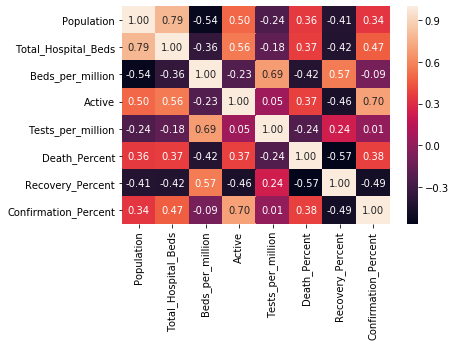

In [1580]:
df=df_final.iloc[:,[1,17,18,23,24,25,26,27]] #Selecting important columns 
sns.heatmap(df.corr(),annot=True, fmt=".2f") #Displaying correlation between columns

In [1552]:
#Predicting no. of hospital beds that will be required in future
X=df_final[['Confirmation_Percent','Active','Population']] #Selecting independent columns having good correlation with Total_Hospital_Beds 
y=df_final['Total_Hospital_Beds'] #Dependent column

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) #Splitting into training and testing set

l=LinearRegression() #Instantiating Linear Regression

l.fit(X_train,y_train) #Fitting data

y_pred=l.predict(X_test) #Predicting data

r=r2_score(y_test,y_pred) #Checking the obtained results with actual result

r #We have obtained a fair enough value which indicates our model can be used

0.7322890493444087